# Setting Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy as stats

sns.set(color_codes=True)
sns.set_style("dark")
sns.set_context("poster")
matplotlib.rcParams['text.color'] = 'white'

class DamageFormulaNotImplemented(Exception):
    pass

def damage_formula(dataframe, TOWERS, base_attack, BUFFS, multiplier=1, skillups=0):
    DAMAGE_REDUCTION = 1000 / (1140 + 3.5 * 0) # 0 - defense, but ignore def here, if not then set it at 800 or 1000 [most popular]
    attribute = df["Type"].unique()[0]
    if attribute == "Attack":
        return (
            (dataframe["Attack"] + 
             base_attack * (TOWERS['ATTACK'] + TOWERS['ATTACK_ELEMENT'])) *
            multiplier * (1 + skillups + (dataframe["Crit Rate"] / 100) * (dataframe["Crit Dmg"] / 100 + TOWERS['CRIT_DMG']))
        ) * BUFFS['ATTACK'] * DAMAGE_REDUCTION
    else:
        raise DamageFormulaNotImplemented(f"Damage formula for {attribute} has not been implemented yet.")
        
filename = "lushen_20200325.csv"
skill = 3 #  not used anywhere, just to know which skill will used to calculate dmg
skillups = .3 # +10% +10% +10%
multiplier = .68
base_attack = 900

TOWERS = {
    'CRIT_DMG': .25,
    'SPEED': .15,
    'ATTACK': .20,
    'ATTACK_ELEMENT': .21,
    'DEFENSE': .20,
    'HP': .20,
}

BUFFS = {
    'ATTACK': 1.5,
    'SPEED': .3,
    'CRIT_RATE': .3,
    'DEFENSE': 1.5,
}

df = pd.read_csv(filename, index_col="ID")
df["Damage"] = damage_formula(df, TOWERS, base_attack, BUFFS, multiplier, skillups)
print(df.columns)
df.sort_values(["Damage"], ascending=False, inplace=True)
df.fillna(value={'Sets': 'Broken'}, inplace=True)
df

Index(['Monster', 'Level', 'Type', 'Stars', 'HP', 'Attack', 'Defense', 'Speed',
       'Resistance', 'Accuracy', 'Crit Rate', 'Crit Dmg', 'Avg Eff', 'Eff. HP',
       'Eff. HP D-B', 'Sets', 'Skilled Up', 'Acquired', 'Locked',
       'Transmogrified', 'HoH', 'HoH Date', 'Fusion', 'Rune #1', 'Rune #2',
       'Rune #3', 'Rune #4', 'Rune #5', 'Rune #6', 'Damage'],
      dtype='object')


,Monster,Level,Type,Stars,HP,Attack,Defense,Speed,Resistance,Accuracy,...,HoH,HoH Date,Fusion,Rune #1,Rune #2,Rune #3,Rune #4,Rune #5,Rune #6,Damage
ID,,,,,,,,,,,,,,,,,,,,,
804139077,Lushen,40,Attack,6,13460,3008,760,136,15,15,...,False,NaN,False,ATK+,ATK%,DEF+,CDmg%,HP+,ATK%,12297.612105
11901784322,Lushen,40,Attack,6,19010,3038,645,124,20,0,...,False,NaN,False,ATK+,ATK%,DEF+,CDmg%,HP+,ATK%,12283.400553
1956753745,Lushen,40,Attack,6,13685,2858,662,151,22,19,...,False,NaN,False,ATK+,ATK%,DEF+,CDmg%,HP+,ATK%,11918.839579
9493396292,Lushen,40,Attack,6,15640,2813,686,139,15,5,...,False,NaN,False,ATK+,ATK%,DEF+,CDmg%,HP+,ATK%,11903.242347
5406514872,Lushen,40,Attack,6,13617,2997,629,140,15,10,...,False,NaN,False,ATK+,ATK%,DEF+,CDmg%,HP+,ATK%,11896.152632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15004361422,Lushen,1,Attack,5,4521,453,372,119,27,10,...,False,NaN,False,NaN,NaN,DEF+,CDmg%,NaN,ATK%,1270.163053
8918952792,Lushen,32,Attack,5,6465,632,324,103,15,0,...,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,1265.079605
15089497131,Lushen,30,Attack,4,4995,487,250,103,15,0,...,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,1081.826316


# Stars Distribution, picking 6*

(407, 30)


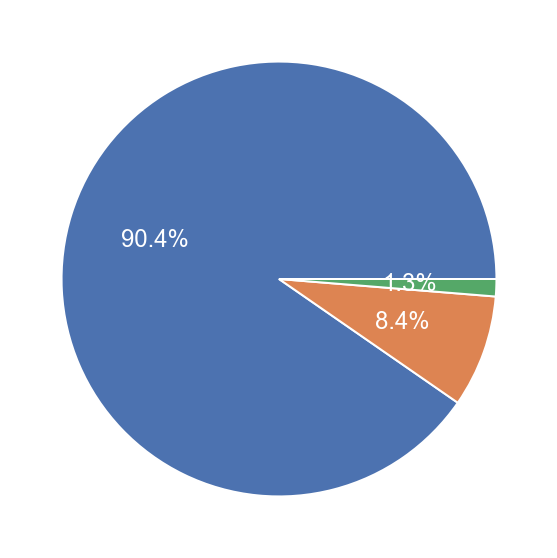

In [2]:
fig = plt.figure(figsize=(10, 10))
stars = df["Stars"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%')
plt.savefig("lushen_pie_6stars.png", transparent=True, bbox_inches = "tight")
df_stars6 = df[(df["Stars"] == 6) & (df["Avg Eff"] > 40)] # pick only 6*
print(df_stars6.shape)

# Skilled Up

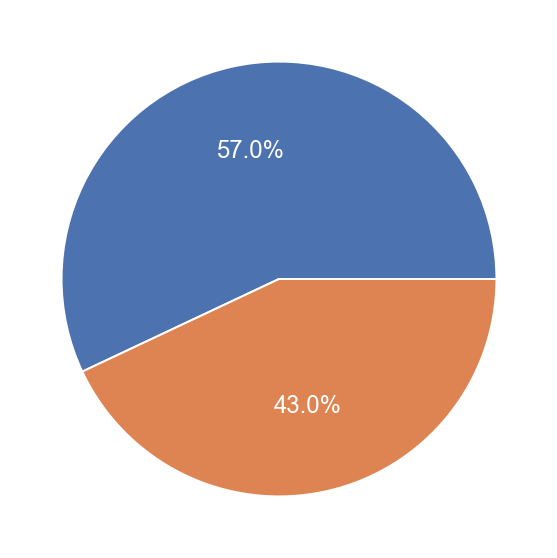

In [3]:
fig = plt.figure(figsize=(10, 10))
stars = df_stars6["Skilled Up"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%')
plt.savefig("lushen_pie_skillups.png", transparent=True, bbox_inches = "tight")
plt.show()

# Transmogrified

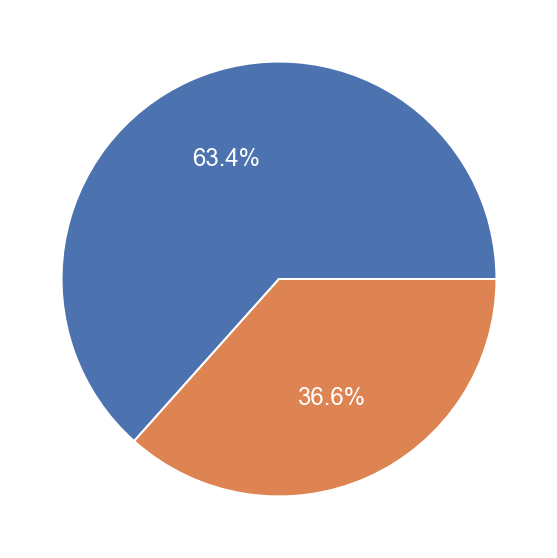

In [4]:
fig = plt.figure(figsize=(10, 10))
stars = df_stars6["Transmogrified"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%')
plt.savefig("lushen_pie_transmog.png", transparent=True, bbox_inches = "tight")
plt.show()

# Damage Distribution

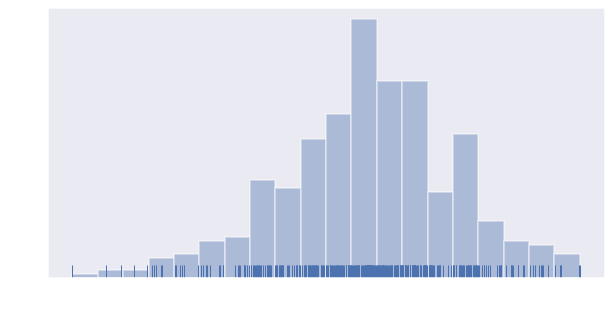

In [5]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Damage"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig("lushen_dist_dmg.png", transparent=True, bbox_inches = "tight")

# Avg. Rune Distribution

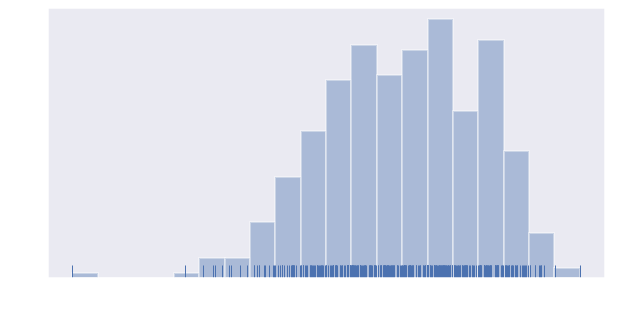

In [6]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Avg Eff"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig("lushen_dist_eff.png", transparent=True, bbox_inches = "tight")

# Sets

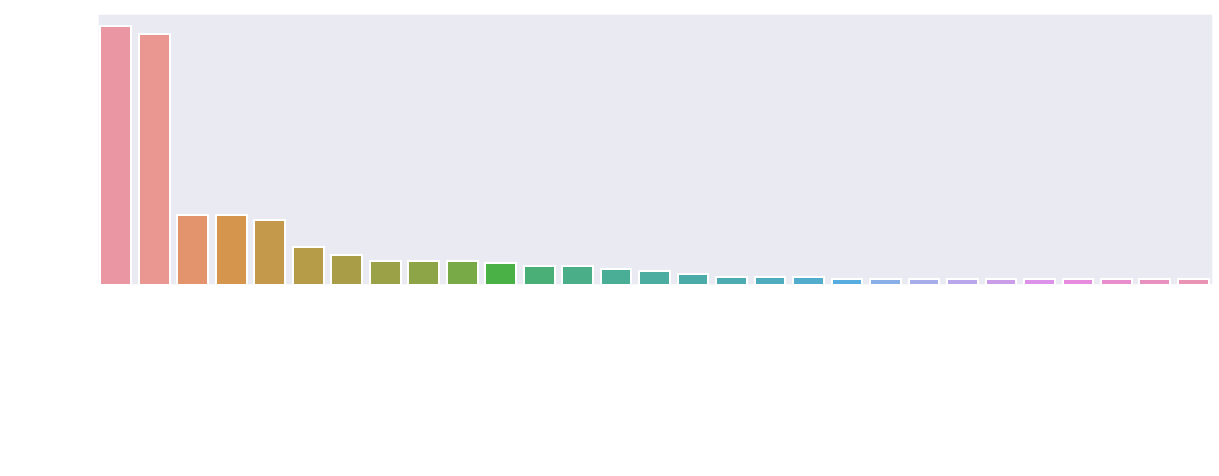

In [7]:
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
counts = counts[counts > 1]
x, y = counts.index, counts.values
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig("lushen_dist_sets.png", transparent=True, bbox_inches = "tight")

# Damage Distribution for most common set

Blade + Rage


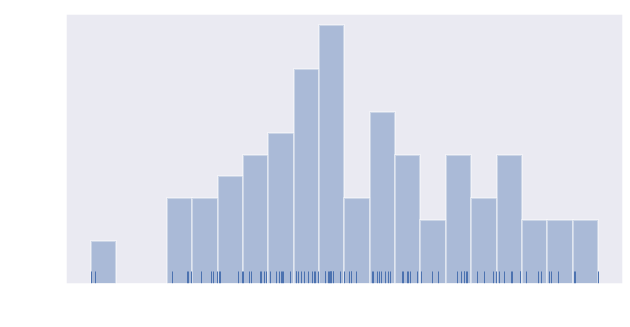

In [8]:
most_common_set = counts.index[0]
print(most_common_set)

fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Damage"][df_stars6["Sets"] == most_common_set], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig("lushen_dist_common_set.png", transparent=True, bbox_inches = "tight")

# Set for Highest Damage

In [9]:
highest_damage_set = df_stars6.iloc[:1]["Sets"].values[0]
print(highest_damage_set)

Blade + Rage


# Damage Distribution for set with Highest Damage

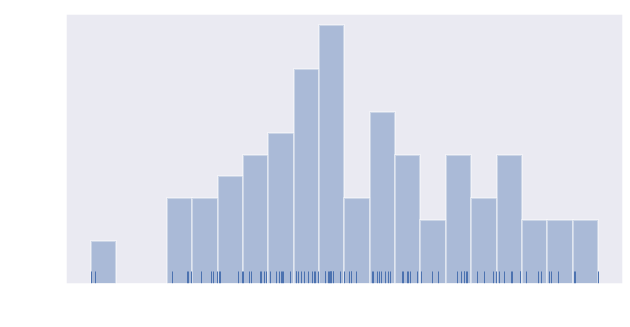

In [10]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Damage"][df_stars6["Sets"] == highest_damage_set], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig("lushen_dist_damage_set.png", transparent=True,  bbox_inches = "tight")

# Speed Distribution

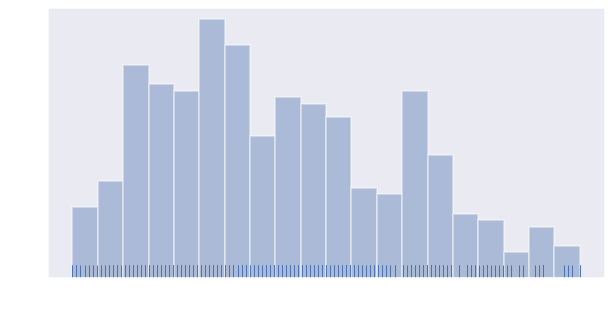

In [11]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig("lushen_dist_speed.png", transparent=True,  bbox_inches = "tight")

# Speed - Damage Relation

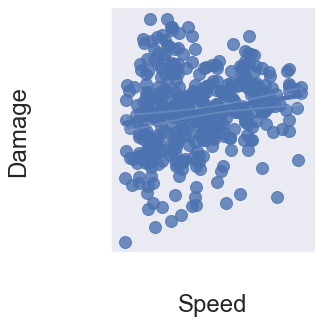

In [12]:
sns.lmplot(x="Speed", y="Damage", data=df_stars6)
plt.tick_params(labelcolor='white')
plt.savefig("lushen_rel_spd_dmg.png", transparent=True,  bbox_inches = "tight")

# Speed Distribution for TOP 10% Damage

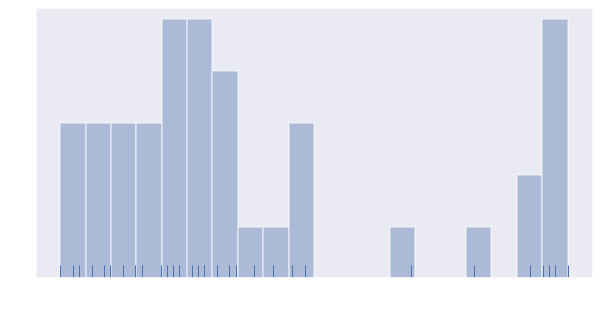

In [13]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"].head(int(df_stars6.shape[0] * .1)), bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig("lushen_dist_speed_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Speed - Damage Relation for TOP 10% Damage

<Figure size 720x360 with 0 Axes>

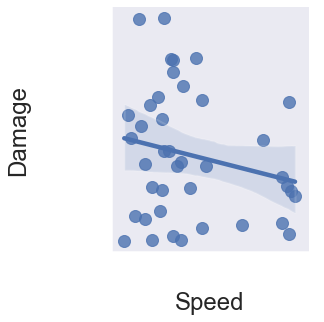

In [14]:
fig = plt.figure(figsize=(10, 5))
sns.lmplot(x="Speed", y="Damage", data=df_stars6.head(int(df_stars6.shape[0] * .1)))
plt.tick_params(labelcolor='white')
plt.savefig("lushen_rel_spd_dmg_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Best by Category

In [15]:
cols = ['HP', 'Attack', 'Defense', 'Speed', 'Resistance', 'Accuracy', 'Crit Rate', 'Crit Dmg', 'Avg Eff', 'Eff. HP', 'Eff. HP D-B', 'Damage']
df_best = pd.DataFrame(columns=["ID"] + cols)
df_best.set_index("ID", drop=True, inplace=True)

best = list()
for column in cols:
    best.append(int(round(df.sort_values([column], ascending=False)[column].head(1).values[0])))
    
df_best.loc[1] = best
df_best

,HP,Attack,Defense,Speed,Resistance,Accuracy,Crit Rate,Crit Dmg,Avg Eff,Eff. HP,Eff. HP D-B,Damage
ID,,,,,,,,,,,,
1,22615,3513,963,232,67,74,127,266,108,80486,51550,12298


# First & last Monster

In [16]:
newest = df_stars6.sort_values(["Acquired"], ascending=False)["Acquired"].head(1).values[0]
oldest = df_stars6.sort_values(["Acquired"], ascending=False)["Acquired"].tail(1).values[0]
print(oldest, newest)

2014-08-06 13:09:27 2020-02-14 05:49:03


# Most common Builds

  Rune #2 Rune #4 Rune #6  Count
0    ATK%    ATK%    ATK%      5
2    ATK%   CDmg%    ATK%    330
3    ATK%   CDmg%     HP%      2
4    ATK%  CRate%    ATK%      3
7     SPD    ATK%    ATK%      2
9     SPD   CDmg%    ATK%     56


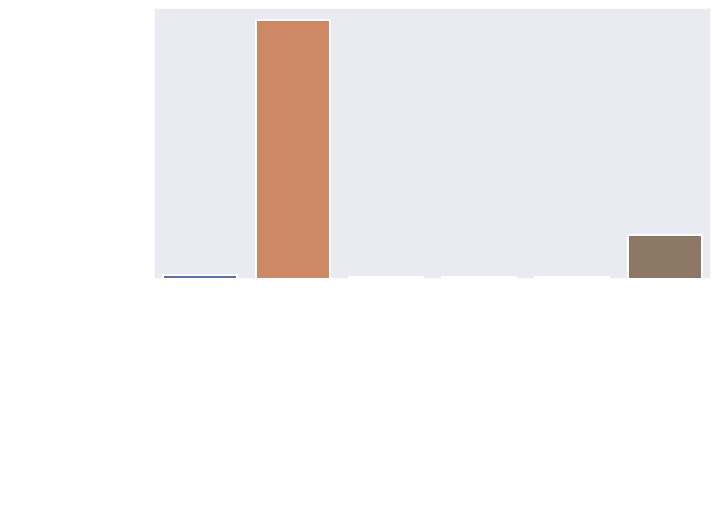

In [17]:
fig = plt.figure(figsize=(10, 5))

builds_count = df_stars6.groupby(["Rune #2", "Rune #4", "Rune #6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 1] # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Rune #2", "Rune #4", "Rune #6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
_ = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig("lushen_build_common.png", transparent=True, bbox_inches = "tight")

# Builds for most common set

  Rune #2 Rune #4 Rune #6  Count
1    ATK%   CDmg%    ATK%     86
3     SPD   CDmg%    ATK%      8


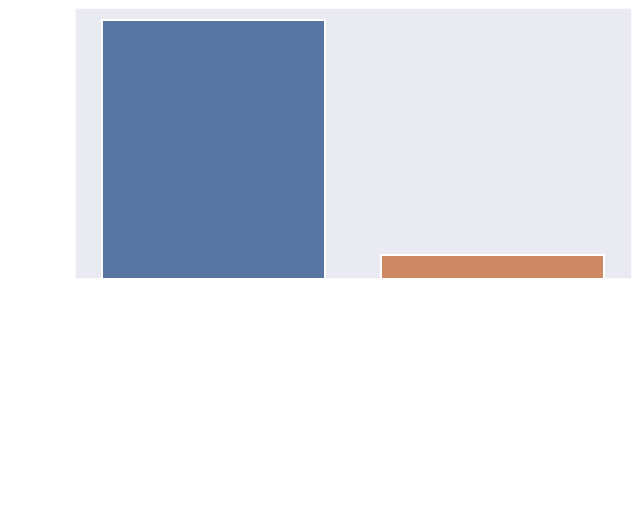

In [18]:
fig = plt.figure(figsize=(10, 5))
builds_count = df_stars6[df_stars6["Sets"] == most_common_set].groupby(["Rune #2", "Rune #4", "Rune #6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 1] # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Rune #2", "Rune #4", "Rune #6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
ax = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
builds_common.tick_params(labelcolor='white')
plt.savefig("lushen_build_common_set.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 2

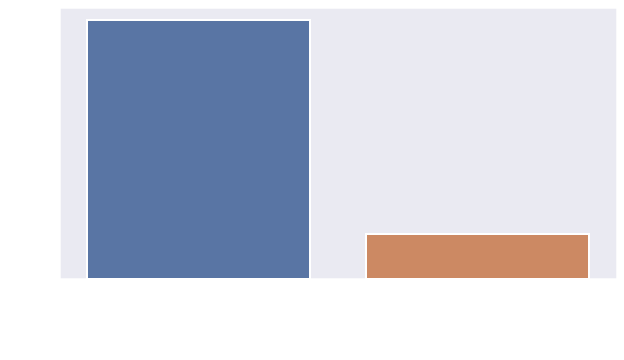

In [19]:
fig = plt.figure(figsize=(10, 5))

counts_slot2 = df_stars6["Rune #2"].value_counts()
counts_slot2 = counts_slot2[counts_slot2 > 1]
x, y = counts_slot2.index, counts_slot2.values
slot2 = sns.barplot(x=x, y=y)
_ = slot2.set_xticklabels(slot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig("lushen_slot_2.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 4

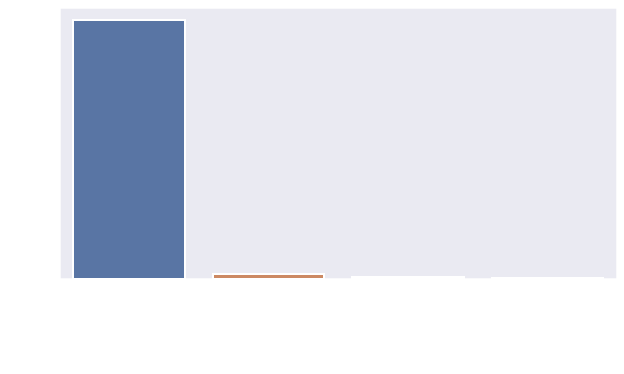

In [20]:
fig = plt.figure(figsize=(10, 5))

counts_slot4 = df_stars6["Rune #4"].value_counts()
counts_slot4 = counts_slot4[counts_slot4 > 1]
x, y = counts_slot4.index, counts_slot4.values
slot4 = sns.barplot(x=x, y=y)
_ = slot4.set_xticklabels(slot4.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig("lushen_slot_4.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 6

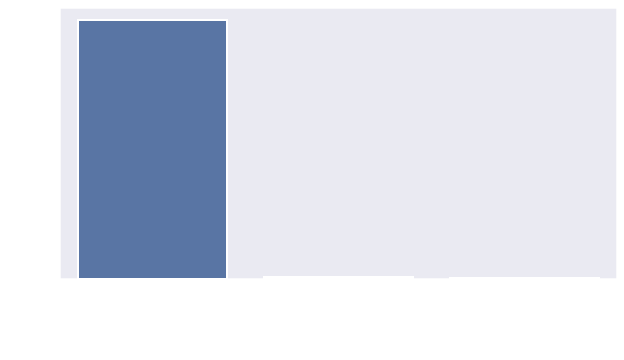

In [21]:
fig = plt.figure(figsize=(10, 5))

counts_slot6 = df_stars6["Rune #6"].value_counts()
counts_slot6 = counts_slot6[counts_slot6 > 1]
x, y = counts_slot6.index, counts_slot6.values
slot6 = sns.barplot(x=x, y=y)
_ = slot6.set_xticklabels(slot6.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig("lushen_slot_6.png", transparent=True, bbox_inches = "tight")